In [192]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./ionosphere.csv', header=None)

In [193]:
# Checking the dataset size and shape
print(df.shape)

(351, 35)


In [194]:
# Checking for skewness
print(df.skew())

0    -2.532392
1     0.000000
2    -1.851541
3    -0.228268
4    -1.627778
5    -0.279440
6    -1.307027
7    -0.217991
8    -1.091865
9    -0.028738
10   -1.044918
11   -0.081149
12   -0.876225
13   -0.219482
14   -0.775888
15   -0.098106
16   -0.821593
17    0.005083
18   -0.833409
19    0.059601
20   -0.665995
21    0.066805
22   -0.744519
23    0.045253
24   -0.881588
25    0.053157
26   -1.287053
27    0.066707
28   -0.885749
29    0.031059
30   -0.810506
31    0.069350
32   -0.606070
33    0.112646
dtype: float64


In [195]:
# Checking if normalization is required
print(df.describe())

               0      1           2           3           4           5   \
count  351.000000  351.0  351.000000  351.000000  351.000000  351.000000   
mean     0.891738    0.0    0.641342    0.044372    0.601068    0.115889   
std      0.311155    0.0    0.497708    0.441435    0.519862    0.460810   
min      0.000000    0.0   -1.000000   -1.000000   -1.000000   -1.000000   
25%      1.000000    0.0    0.472135   -0.064735    0.412660   -0.024795   
50%      1.000000    0.0    0.871110    0.016310    0.809200    0.022800   
75%      1.000000    0.0    1.000000    0.194185    1.000000    0.334655   
max      1.000000    0.0    1.000000    1.000000    1.000000    1.000000   

               6           7           8           9   ...          24  \
count  351.000000  351.000000  351.000000  351.000000  ...  351.000000   
mean     0.550095    0.119360    0.511848    0.181345  ...    0.396135   
std      0.492654    0.520750    0.507066    0.483851  ...    0.578451   
min     -1.000000  

In [196]:
# Removing target varible

y = df[34]
df.drop(columns=[34], inplace=True)

In [197]:
# Label Encoding the target variable

y = y.replace({"g": 0, "b": 1})

In [198]:
# Checking if label encoding worked
print(y.head())

0    0
1    1
2    0
3    1
4    0
Name: 34, dtype: int64


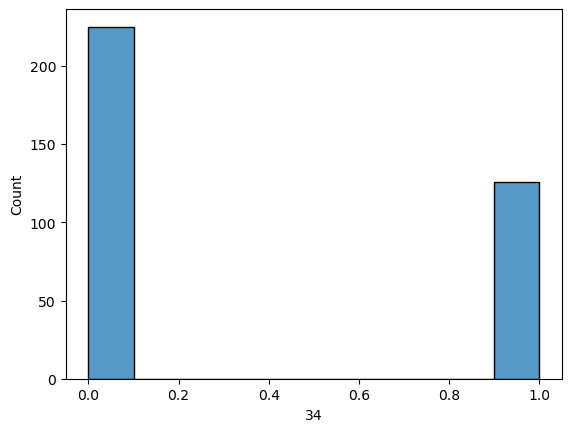

In [199]:
# Data distribution in target variable
sns.histplot(y)
plt.show()

In [200]:
# Importing confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Implementing Decision Tree Classifier

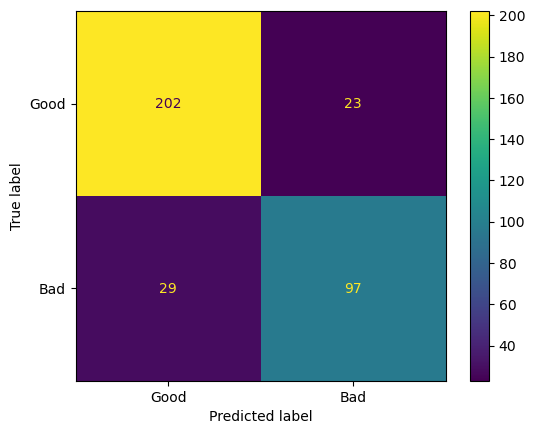

In [201]:
# Implementing Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict

clf = DecisionTreeClassifier(random_state=0)

# Cross val predict implements the cross validation and provides the predicted values on the classifier
y_pred = cross_val_predict(clf, df, y, cv=5)

conf_mat = confusion_matrix(y, y_pred)
cm_display = ConfusionMatrixDisplay(conf_mat, display_labels=["Good", "Bad"]).plot()
plt.show()

## Metrics for Decision Tree Classifier

Accuracy : 0.8518518518518519
Specificity : 0.8977777777777778
Sensitivity : 0.7698412698412699
Area under curve:  0.8338095238095238
              precision    recall  f1-score   support

        Good       0.87      0.90      0.89       225
         Bad       0.81      0.77      0.79       126

    accuracy                           0.85       351
   macro avg       0.84      0.83      0.84       351
weighted avg       0.85      0.85      0.85       351



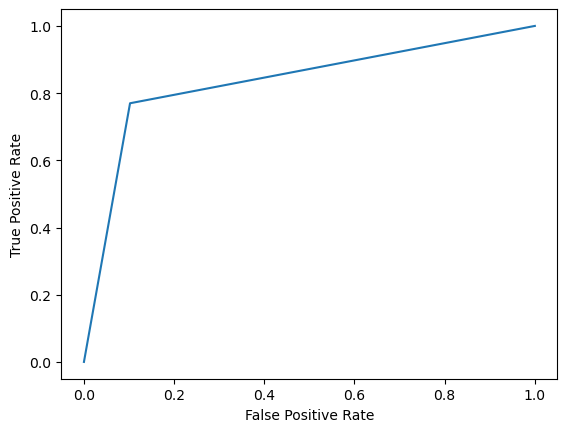

In [202]:
# Importing metrics for the metrics calculation

from sklearn.metrics import accuracy_score, roc_curve, RocCurveDisplay, classification_report, auc

print("Accuracy :", accuracy_score(y, y_pred))

tn, fp, fn, tp = conf_mat.ravel()
print("Specificity :", (tn / (tn+fp)))
print("Sensitivity :", (tp / (tp+fn)))

fpr, tpr, _ = roc_curve(y, y_pred)
print("Area under curve: ", auc(fpr, tpr))
print(classification_report(y, y_pred, target_names = ['Good', 'Bad']))
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.show()


# Implementing Random Forest Classifier

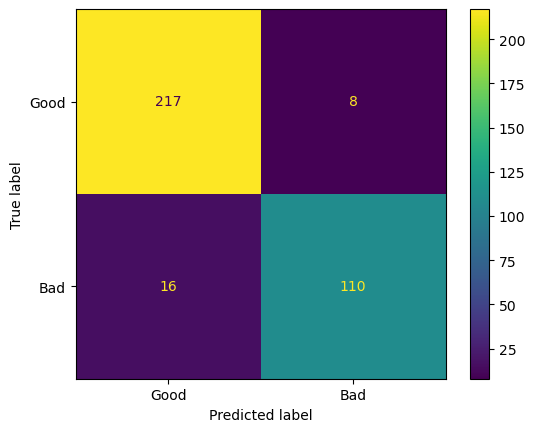

In [203]:
# Implementing Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)

y_pred = cross_val_predict(clf, df, y, cv=5)
conf_mat = confusion_matrix(y, y_pred)
cm_display = ConfusionMatrixDisplay(conf_mat, display_labels=["Good", "Bad"]).plot()
plt.show()

## Metrics for random forest classifer

Accuracy : 0.9316239316239316
Specificity : 0.9644444444444444
Sensitivity : 0.873015873015873
Area under curve:  0.9187301587301587
              precision    recall  f1-score   support

        Good       0.93      0.96      0.95       225
         Bad       0.93      0.87      0.90       126

    accuracy                           0.93       351
   macro avg       0.93      0.92      0.92       351
weighted avg       0.93      0.93      0.93       351



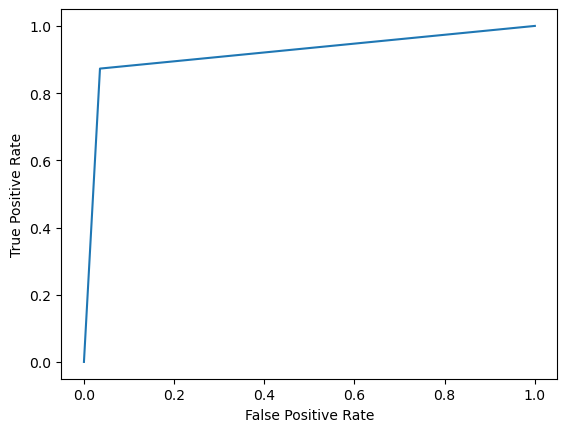

In [204]:
# Calculating metrics for random forest classifier

print("Accuracy :", accuracy_score(y, y_pred))

tn, fp, fn, tp = conf_mat.ravel()
print("Specificity :", (tn / (tn+fp)))
print("Sensitivity :", (tp / (tp+fn)))

fpr, tpr, _ = roc_curve(y, y_pred)
print("Area under curve: ", auc(fpr, tpr))
print(classification_report(y, y_pred, target_names = ["Good", "Bad"]))
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.show()
